## This file loads output data from an earlier performed sensitivity analysis and creates appropriate plots. 

#### First, some packages need to be imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SALib.analyze import sobol

#### We start with plotting the OFAT SA outcomes for all strategies. Due to the automatisation of the plotting, some plots might be empty.

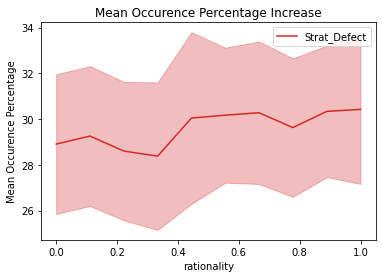

No handles with labels found to put in legend.


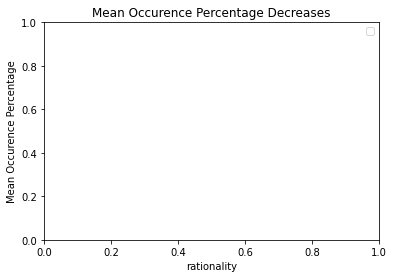

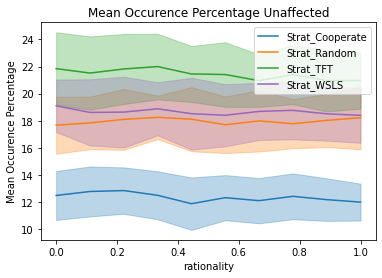

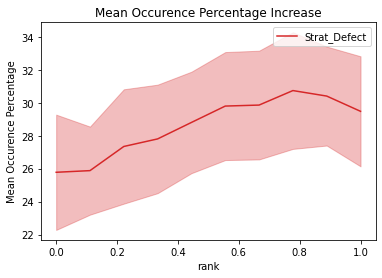

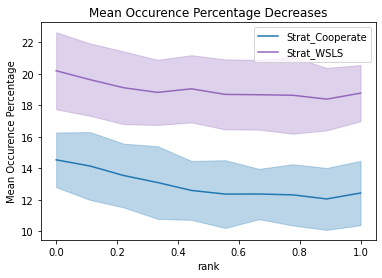

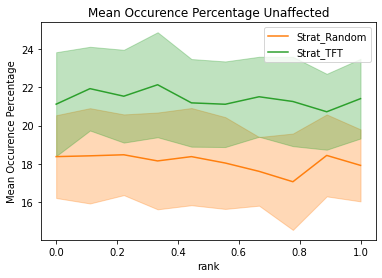

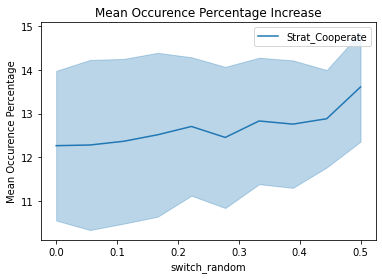

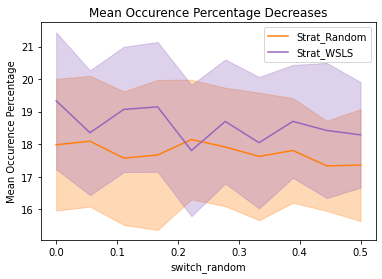

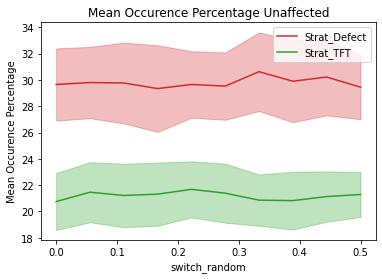

In [2]:
for key in ["rationality", "rank","switch_random"]:
    data = pd.read_csv("ofat_{}.csv".format(key)) #Read the apropriate csv and columns
    df = data.iloc[:,[1,5,6,7,8,9]]
    
    strats = list(df)[1:] # the strategies
    rations = pd.unique(df[key]) # steps taken
    undict_rat = np.ones((len(strats),df[df[key] == rations[0]].shape[0],len(rations)))
    colors = np.array(['tab:blue','tab:red','tab:orange','tab:green','tab:purple']) #to use the same colors for all
    
    for index, ration in enumerate(rations): #Get the data out of the dicts
        for j, strat in enumerate(strats):
            undict_rat[j,:,index] = df[df[key]==ration][strat]
    
    undict_rat = 100*undict_rat/np.sum(undict_rat,axis=0) #safe them as ratios

    mean = np.mean(undict_rat,axis=1)

    A = np.vstack([rations, np.ones(len(rations))]).T #determine the slopes
    rcs = np.zeros((5))
    for strati in range(5):
        m, c  = np.linalg.lstsq(A,mean[strati,:],rcond=None)[0]
        rcs[strati] = m
    
    #Plotting
    xaxis = np.arange(0,10)
    mean = np.mean(undict_rat,axis=1)
    std = np.std(undict_rat,axis=1)
    strats = np.asarray(strats)
    mask = rcs>=1

    for i in range(sum(mask)):

        plt.plot(rations,mean[mask,:][i],label=strats[mask][i],c=colors[mask][i])
        plt.fill_between(rations, mean[mask,:][i] - std[mask,:][i], mean[mask,:][i] + std[mask,:][i],alpha=0.3,color=colors[mask][i])
    plt.ylabel("Mean Occurence Percentage")
    plt.xlabel(key)
    plt.title("Mean Occurence Percentage Increase")
    plt.legend()
    plt.savefig("ofat_in_{}.png".format(key),bbox_inches='tight')
    plt.show()


    mask = rcs<=-1
    for i in range(sum(mask)):

        plt.plot(rations,mean[mask,:][i],label=strats[mask][i],c=colors[mask][i])
        plt.fill_between(rations, mean[mask,:][i] - std[mask,:][i], mean[mask,:][i] + std[mask,:][i],alpha=0.3,color=colors[mask][i])


    plt.ylabel("Mean Occurence Percentage")
    plt.xlabel(key)
    plt.title("Mean Occurence Percentage Decreases")
    plt.legend()
    plt.savefig("ofat_dec_{}.png".format(key),bbox_inches='tight')
    plt.show()


    mask = np.logical_and(rcs>-1,rcs<1)
    for i in range(sum(mask)):

        plt.plot(rations,mean[mask,:][i],label=strats[mask][i],c=colors[mask][i])
        plt.fill_between(rations, mean[mask,:][i] - std[mask,:][i], mean[mask,:][i] + std[mask,:][i],alpha=0.3,color=colors[mask][i])

    plt.ylabel("Mean Occurence Percentage")
    plt.xlabel(key)
    plt.title("Mean Occurence Percentage Unaffected")
    plt.legend()
    plt.savefig("ofat_un_{}.png".format(key),bbox_inches='tight')
    plt.show()

#### Next, we plot the OFAT SA outcomes for the total amount of cooperations and defections

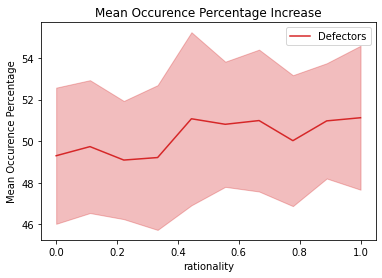

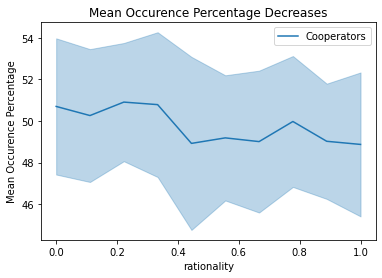

No handles with labels found to put in legend.


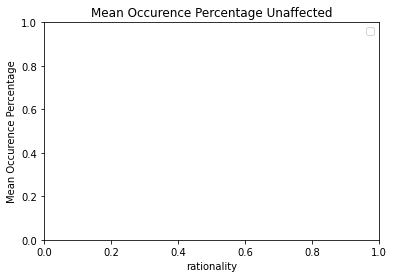

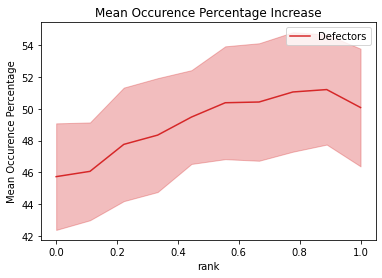

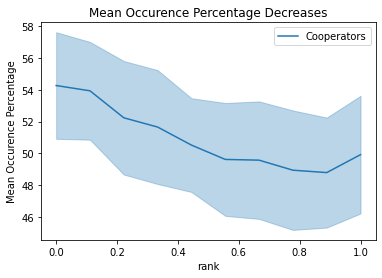

No handles with labels found to put in legend.


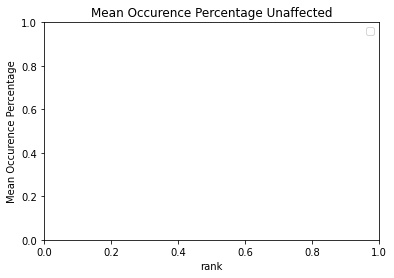

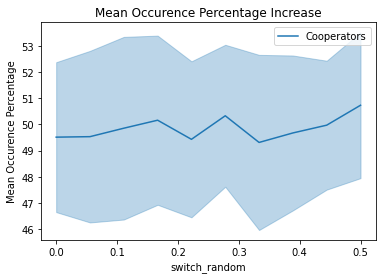

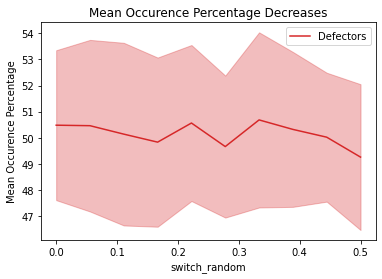

No handles with labels found to put in legend.


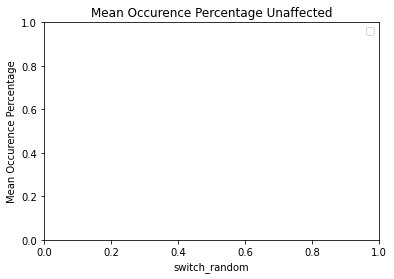

In [3]:
for key in ["rationality", "rank","switch_random"]:
    data = pd.read_csv("ofat_{}.csv".format(key))
    df = data.iloc[:,[1,3,4]]
    strats = list(df)[1:] 
    rations = pd.unique(df[key])
    undict_rat = np.ones((len(strats),df[df[key] == rations[0]].shape[0],len(rations)))
    colors = np.array(['tab:blue','tab:red'])
    
    for index, ration in enumerate(rations):
        for j, strat in enumerate(strats):
            undict_rat[j,:,index] = df[df[key]==ration][strat]
    
    undict_rat = 100*undict_rat/np.sum(undict_rat,axis=0)

    mean = np.mean(undict_rat,axis=1)
    
    A = np.vstack([rations, np.ones(len(rations))]).T
    rcs = np.zeros((2))
    for strati in range(2):
        m, c  = np.linalg.lstsq(A,mean[strati,:],rcond=None)[0]
        rcs[strati] = m

    xaxis = np.arange(0,10)
    mean = np.mean(undict_rat,axis=1)
    std = np.std(undict_rat,axis=1)
    strats = np.asarray(strats)
    mask = rcs>=1

    for i in range(sum(mask)):

        plt.plot(rations,mean[mask,:][i],label=strats[mask][i],c=colors[mask][i])
        plt.fill_between(rations, mean[mask,:][i] - std[mask,:][i], mean[mask,:][i] + std[mask,:][i],alpha=0.3,color=colors[mask][i])

    plt.ylabel("Mean Occurence Percentage")
    plt.xlabel(key)
    plt.title("Mean Occurence Percentage Increase")
    plt.legend()
    plt.savefig("lofat_in_{}_cop.png".format(key),bbox_inches='tight')
    plt.show()

    mask = rcs<=-1
    for i in range(sum(mask)):

        plt.plot(rations,mean[mask,:][i],label=strats[mask][i],c=colors[mask][i])
        plt.fill_between(rations, mean[mask,:][i] - std[mask,:][i], mean[mask,:][i] + std[mask,:][i],alpha=0.3,color=colors[mask][i])

    plt.ylabel("Mean Occurence Percentage")
    plt.xlabel(key)
    plt.title("Mean Occurence Percentage Decreases")
    plt.legend()
    plt.savefig("lofat_dec_{}_cop.png".format(key),bbox_inches='tight')
    plt.show()

    mask = np.logical_and(rcs>-1,rcs<1)
    for i in range(sum(mask)):

        plt.plot(rations,mean[mask,:][i],label=strats[mask][i],c=colors[mask][i])
        plt.fill_between(rations, mean[mask,:][i] - std[mask,:][i], mean[mask,:][i] + std[mask,:][i],alpha=0.3,color=colors[mask][i])

    plt.ylabel("Mean Occurence Percentage")
    plt.xlabel(key)
    plt.title("Mean Occurence Percentage Unaffected")
    plt.legend()
    plt.savefig("lofat_un_{}_cop.png".format(key),bbox_inches='tight')
    plt.show()

#### Then, the Sobol SA. First, we load the data and analyse it using the SALib package. The outcomes are preprocessed to represent lists for plotting. Also, a function for plotting is defined.

In [4]:
# Load data
data = pd.read_csv("Sobol_All.csv") 
data = data.loc[:, data.columns != "Unnamed: 0"]

# We define our variables and bounds
problem = {
    'num_vars': 3,
    'names': ['rationality', 'rank', 'switch_random'],
    'bounds': [[0, 1], [0, 1], [0, 0.5]]
}

# Analyse data
Si_coops = sobol.analyze(problem, data['Cooperators'].values, print_to_console=True)
Si_defec = sobol.analyze(problem, data['Defectors'].values, print_to_console=True)
Si_stratcop = sobol.analyze(problem, data['Strat_Cooperate'].values, print_to_console=True)
Si_stratdef = sobol.analyze(problem, data['Strat_Defect'].values, print_to_console=True)
Si_strattft = sobol.analyze(problem, data['Strat_TFT'].values, print_to_console=True)
Si_stratrand = sobol.analyze(problem, data['Strat_Random'].values, print_to_console=True)
Si_stratwsls = sobol.analyze(problem, data['Strat_WSLS'].values, print_to_console=True)

# Create lists for plotting
Si_all = [Si_coops , Si_defec, Si_stratcop, Si_stratdef, Si_strattft, Si_stratrand , Si_stratwsls]
Si_names = ["Total Cooperations" , "Total Defections", "Strategy: Cooperate",
            "Strategy: Defect", "Tit For Tat", "Random" , "Win-Stay Lose-Shift"]
Si_rationality, Err_rationality, St_rationality, StErr_rationality = [], [], [], []
Si_rank, Err_rank, St_rank, StErr_rank = [], [], [], []
Si_switchrandom, Err_switchrandom, St_switchrandom, StErr_switchrandom = [], [], [], []
for SI in Si_all: 
    Si_rationality.append(SI['S1'][0])
    Si_rank.append(SI['S1'][1])
    Si_switchrandom.append(SI['S1'][2])
    
    Err_rationality.append(SI['S1_conf'][0])
    Err_rank.append(SI['S1_conf'][1])
    Err_switchrandom.append(SI['S1_conf'][2])
    
    St_rationality.append(SI['ST'][0])
    St_rank.append(SI['ST'][1])
    St_switchrandom.append(SI['ST'][2])
    
    StErr_rationality.append(SI['ST_conf'][0])
    StErr_rank.append(SI['ST_conf'][1])
    StErr_switchrandom.append(SI['ST_conf'][2])
Si_indices = [Si_rationality, Si_rank, Si_switchrandom]
Si_errors = [Err_rationality, Err_rank, Err_switchrandom]
Si_titles = ["Rationality: First order sensitivity", "Rank: First order sensitivity",
             "Switch Random: First order sensitivity"]

St_indices = [St_rationality, St_rank, St_switchrandom]
St_errors = [StErr_rationality, StErr_rank, StErr_switchrandom]
St_titles = ["Rationality: Total order sensitivity", "Rank: Total order sensitivity",
             "Switch Random: Total order sensitivity"]

def plot_input(indices, errors, title):
    """Function for plotting the SOBOL SA"""
    # For colouring
    abs_indices = [abs(x) for x in indices]
    third = (max(abs_indices) - min(abs_indices)) / 3
    color_list = []
    for value in abs_indices:
        if value < third + min(abs_indices):
            color_list.append('g')
        elif value < 2 * third + min(abs_indices):
            color_list.append('orange')
        else:
            color_list.append('r')
            
    # Plot figure
    l = len(indices)
    plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.ylim([-0.2, l - 1 + 0.2])
    plt.yticks(range(l), Si_names)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o', 
                 ecolor=color_list)
    plt.axvline(0, c='k')

Parameter S1 S1_conf ST ST_conf
rationality 0.020036 0.103770 0.919109 0.102345
rank 0.014563 0.129063 1.077781 0.098927
switch_random 0.057599 0.132576 1.126711 0.111508

Parameter_1 Parameter_2 S2 S2_conf
rationality rank 0.123848 0.182830
rationality switch_random 0.204460 0.160108
rank switch_random 0.009527 0.180121
Parameter S1 S1_conf ST ST_conf
rationality 0.148543 0.109245 0.885897 0.130098
rank 0.091976 0.151429 0.967085 0.124201
switch_random 0.095125 0.127935 0.943628 0.105297

Parameter_1 Parameter_2 S2 S2_conf
rationality rank 0.022708 0.177787
rationality switch_random 0.002027 0.161021
rank switch_random -0.140398 0.212752
Parameter S1 S1_conf ST ST_conf
rationality 0.091020 0.111083 0.990201 0.126114
rank 0.084744 0.139649 1.056843 0.114678
switch_random 0.033687 0.149644 1.125622 0.102524

Parameter_1 Parameter_2 S2 S2_conf
rationality rank 0.057813 0.191760
rationality switch_random 0.168283 0.182629
rank switch_random 0.017388 0.208059
Parameter S1 S1_conf ST ST_con

#### Now, we can plot the first-order sensitivity results:

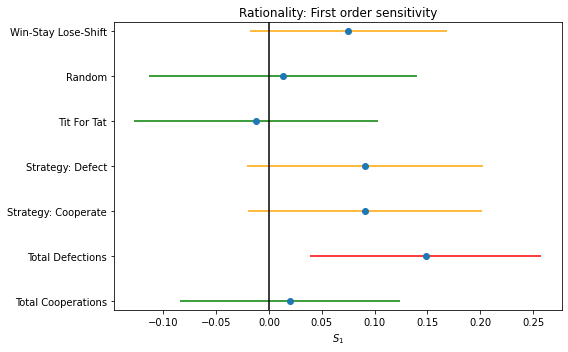

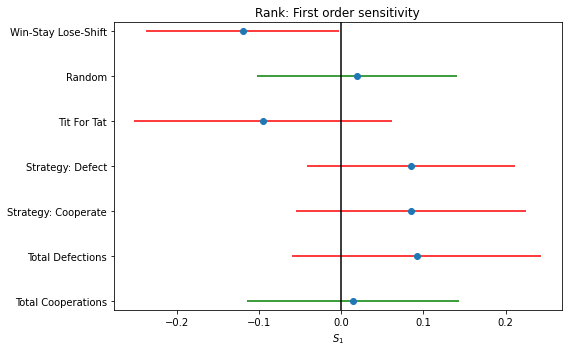

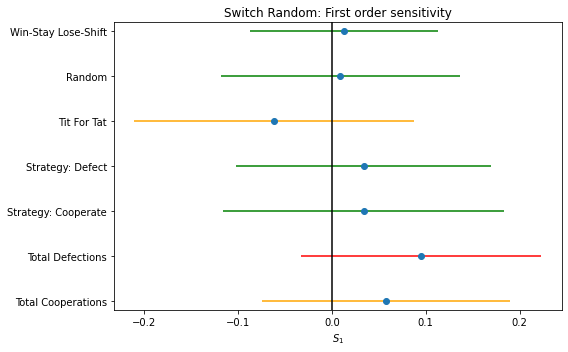

In [5]:
length = len(Si_indices)
for i in range(length):
    plot_input(Si_indices[i], Si_errors[i], Si_titles[i])
    plt.xlabel(r"$S_1$")
    plt.tight_layout()
#     plt.savefig("S1_"+str(i)+".pdf")
    plt.show()

#### And the total-order sensitivity analysis:

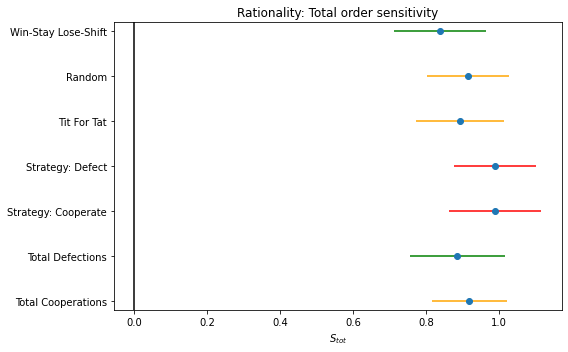

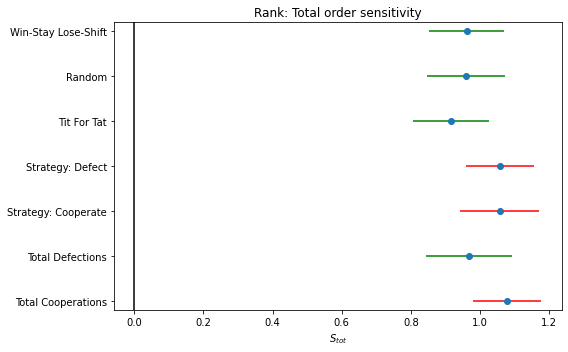

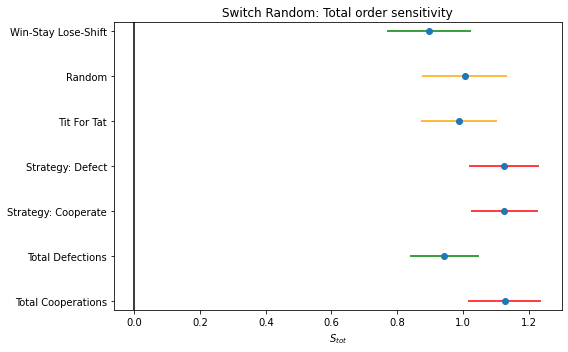

In [6]:
length = len(St_indices)

for i in range(length):
    plot_input(St_indices[i], St_errors[i], St_titles[i])
    plt.xlabel(r"$S_{tot}$")
    plt.tight_layout()
    plt.savefig("ST_"+str(i)+".pdf")
    plt.show()